Below is a Python script showing how to load the core OULAD tables, extract “content-based” features from the VLE interactions (i.e. resource types and click counts), plus a few auxiliary signals (active days, assignment performance), and assemble a per-student feature matrix suitable for content-based profiling in a recommender

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy.stats.mstats import winsorize

In [10]:
student_info = pd.read_csv('../data/raw/OULAD/studentInfo.csv')
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [11]:
student_info.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


# Gender Distribution in Students

<Axes: xlabel='count', ylabel='gender'>

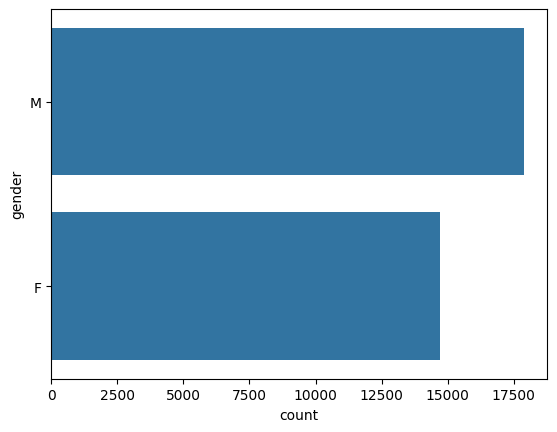

In [12]:
sns.countplot(student_info.gender)

In [13]:
student_info.gender.unique()

array(['M', 'F'], dtype=object)

# Age Distribution of Students


<Axes: xlabel='age_band'>

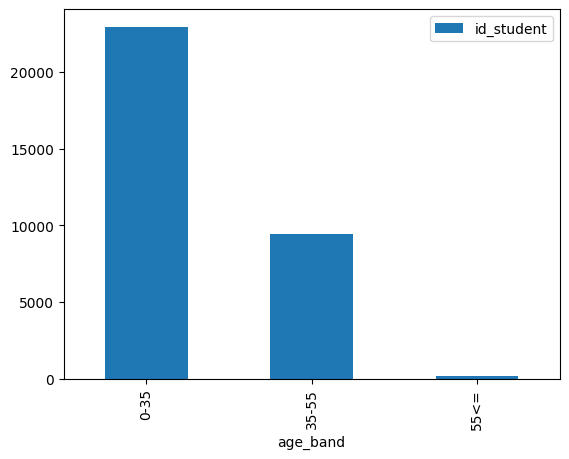

In [14]:
student_info[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar()

# Age vs Geographic Region

<Axes: ylabel='region'>

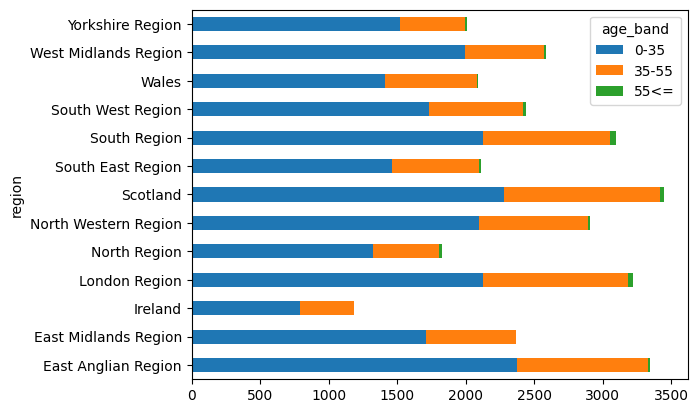

In [15]:
pd.crosstab(student_info.region, student_info.age_band).plot.barh(stacked = True)

In [16]:
student_info.id_student.nunique()

28785

# VLE

In [17]:
vle = pd.read_csv('../data/raw/OULAD/vle.csv')
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [18]:
student_vle = pd.read_csv('../data/raw/OULAD/studentVle.csv')
student_vle = student_vle.merge(vle, on = 'id_site', how = 'left')
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   code_module_x        object 
 1   code_presentation_x  object 
 2   id_student           int64  
 3   id_site              int64  
 4   date                 int64  
 5   sum_click            int64  
 6   code_module_y        object 
 7   code_presentation_y  object 
 8   activity_type        object 
 9   week_from            float64
 10  week_to              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 894.2+ MB


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]),
 [Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0')])

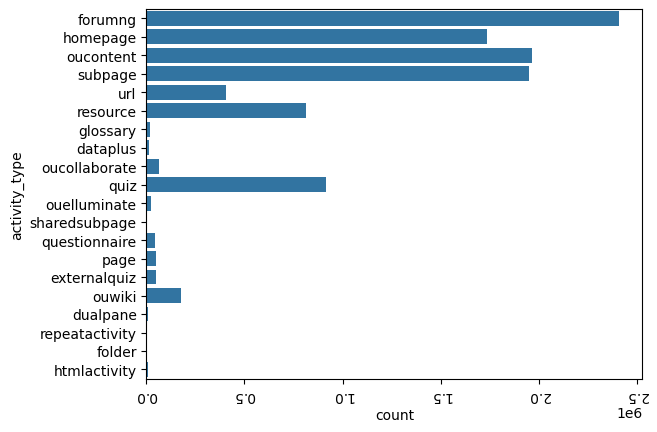

In [20]:
sns.countplot(student_vle.activity_type)
plt.xticks(rotation = 180)

In [23]:
student_interactivity = student_vle[['id_student', 
                                     'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
student_interactivity = student_interactivity.reset_index()
student_interactivity.head()

,id_student,activity_type,sum_click
0,6516,dataplus,5.250000
1,6516,forumng,2.577143
2,6516,homepage,3.145570
3,6516,oucontent,8.179348
4,6516,resource,1.631579


NameError: name 'student_details' is not defined